# Cows and Bulls

### Game Rules

This game is usually played with 4 digits.
One palyer write a 4-digit secret number. The digits must be all different. Then, in turn, the players try to guess their opponent's number who gives the number of matches & matching positions. 
For examples, if the secret number was 3 7 8 1, and opponent guessed it as 4 7 1 8, then in this case count of Matching number is  3 and count of Matching position is 1. Based on this matching numbers & matching positions the opponent will guess another number till opponent guessed the right number. The Goal here is to guess the number in minimum number of attempts.

In [2]:
import sqlite3
import numpy as np
import random
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
eventtime = datetime.datetime.now()
#eventtime = '{:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
USER = (input('Hi, Enter your Name : ').upper())
print('\nWelcome ',USER)
computerGivenNo = random.sample(range(10), 4)
NUMBER = "".join(str(computerGivenNo))
print(computerGivenNo)  

notGuessed = True
attempts = 0
tic = time.time()
while(notGuessed):
    matching = 0
    position = 0
    userGivenNo = np.array(input('Enter four numbers to guess : ').strip().split(),int)
    attempts += 1
    print(userGivenNo,'\n')
    for i in range(4):
        if(computerGivenNo[i]==userGivenNo[i]):
                position += 1

    for i in computerGivenNo:
        if i in userGivenNo:
            matching += 1

    print('Matching Number(s) : ',matching, '       Matching Position(s) : ',position,'\n') 
    if(position ==4):
        notGuessed = False
        
toc = time.time()
duration = round((toc -tic),2)

print('Congratulations, ',USER, ', You have guessed the number in ',attempts,' attempts and took', duration,' seconds\n')

# Database connection
conn = sqlite3.connect('example.db')
c = conn.cursor()

print('Saving data into database\n')
time.sleep(3)

# Create table
#c.execute("CREATE TABLE IF NOT EXISTS COWBULL(USER varchar(20),NUMBER varchar(4),ATTEMPTS int,DURATION real,EVENTTIME text UNIQUE) ")
c.execute("CREATE TABLE IF NOT EXISTS COWBULL(USER varchar(20),NUMBER varchar(4),ATTEMPTS int,DURATION real,EVENTTIME text UNIQUE) ")

# Insert into table
istmnt = '''INSERT INTO COWBULL (USER,NUMBER,ATTEMPTS,DURATION,EVENTTIME) VALUES(?,?,?,?,?)'''
c.execute(istmnt,(USER,NUMBER,attempts,duration,eventtime))
conn.commit()
# Accessing the data through Dataframe
#GameData = c.execute("SELECT * FROM COWBULL ORDER BY EVENTTIME DESC");
GameData = pd.read_sql_query("SELECT * FROM COWBULL ORDER BY EVENTTIME DESC",conn);
conn.close()

GameData

Hi, Enter your Name : as

Welcome  AS
[4, 8, 7, 5]
Enter four numbers to guess : 4 8 7 5
[4 8 7 5] 

Matching Number(s) :  4        Matching Position(s) :  4 

Congratulations,  AS , You have guessed the number in  1  attempts and took 8.22  seconds

Saving data into database



,USER,NUMBER,ATTEMPTS,DURATION,EVENTTIME
0,AS,"[4, 8, 7, 5]",1,8.22,2017-11-20 22:43:14.234299
1,ANKIT,"[1, 0, 8, 7]",4,26.73,2017-10-29 12:20:45.968762
2,ATUL,"[9, 5, 6, 7]",4,29.79,2017-10-28 16:30:38.353943
3,ANKIT,"[6, 8, 4, 1]",4,44.18,2017-10-28 16:24:00.755377


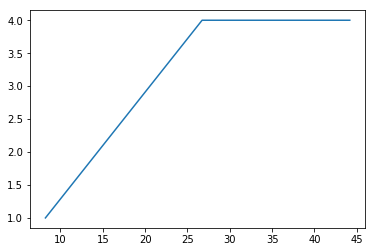

In [4]:
plt.plot(GameData.DURATION,GameData.ATTEMPTS)
plt.show()
